### Imports

In [1]:
from SPDC_Simulation import SPDC_Simulation
from Crystal import Crystal
from Laser import Laser
from Materials import Materials

import warnings
warnings.filterwarnings("ignore")

### Run the simulation

In [2]:
# Initialize crystal parameters
Lc = 46.175e-6                # Coherence length (in meters)
Lo = 30e-3                    # Crystal length (in meters)
T = 28.35                     # Temperature (in degrees Celsius)
w = 18e-6                     # Domain width parameter (in meters)
mstart = 2                    # Starting index for the algorithm

material_db = Materials()
crystal = Crystal(Lc, Lo, T, w, mstart, material_db)

# Initialize laser parameters
lambda_2w = 775e-9            # Central wavelength of the pump (in meters)
pulse_duration = 1.7e-12      # Pulse duration (in seconds)
laser = Laser(lambda_2w, pulse_duration)

# Generate the poling pattern in the crystal
crystal.generate_poling(laser=laser, mode='custom', resolution=5)

# Create and run the simulation
simulation = SPDC_Simulation(crystal, laser)

simulation.run_simulation_optimized(steps=100, dev=5)

### Accessing simulated results

In [3]:
print(f'The simulated purity is P={simulation.Purity}')
print(f'The simulated Schmidt number K={simulation.K}')

The simulated purity is P=0.99433599666502
The simulated Schmidt number K=1.0056962670103233


### Plot the results

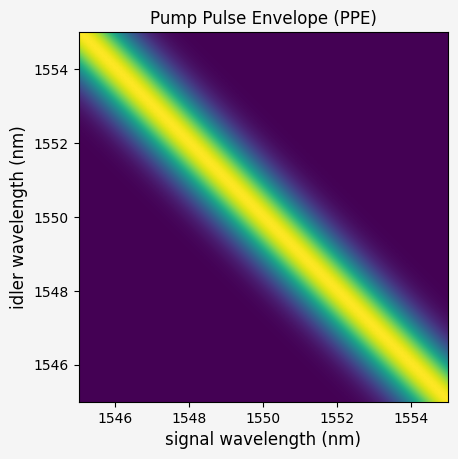

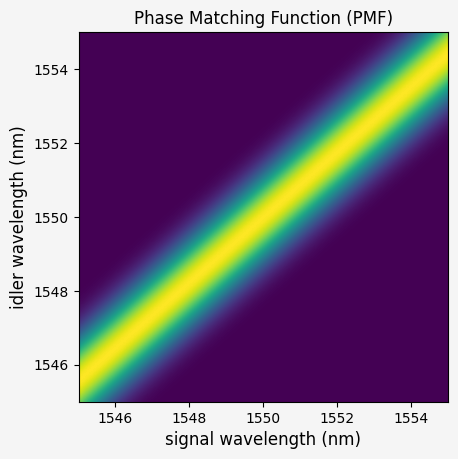

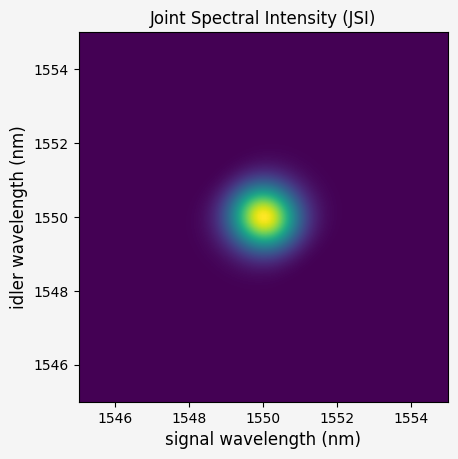

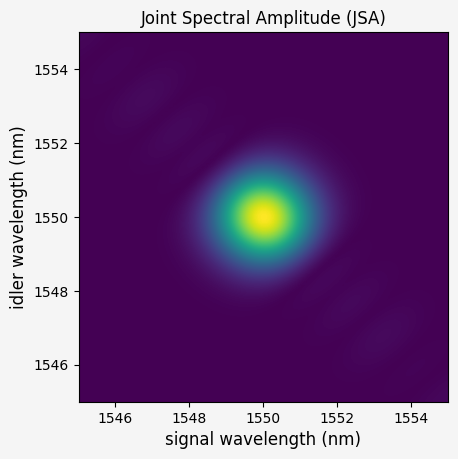

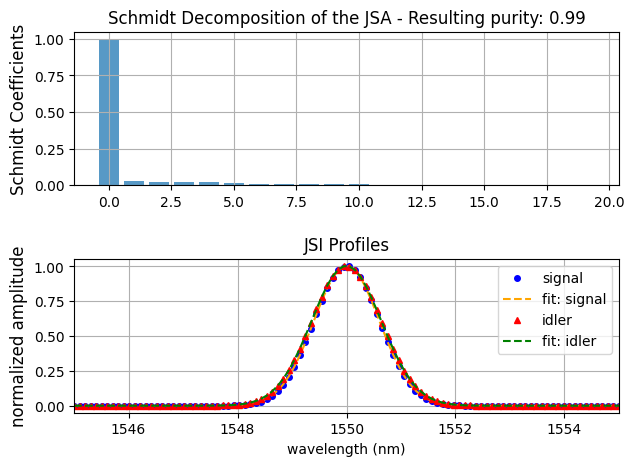

In [4]:
simulation.plot_results()